# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

url = "http://api.openweathermap.org/data/2.5/weather?"



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cityname=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

In [4]:
units = "imperial"
set_count = 1
record_count = 0
for i, city in enumerate(cities):
    if i % 50 == 0 and i >= 50:
        set_count = set_count +1
        record_count = 1
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count = record_count +1
    query_url = f"{url}appid={weather_api_key}&units{units}&q={city}"
    post_response = requests.get(query_url).json()         
    
    try:
        cityname.append(post_response['name'])
        lat.append(post_response['coord']['lat'])
        lng.append(post_response['coord']['lon'])
        max_temp.append(post_response['main']['temp_max'])
        humidity.append(post_response['main']['humidity'])
        cloudiness.append(post_response['clouds']['all'])
        wind_speed.append(post_response['wind']['speed'])
        country.append(post_response['sys']['country'])
        date.append(time.ctime(post_response['dt']))
    except KeyError:
        print("City not found...Skipping...")
    

Processing Record 0 of Set 1 | luganville
Processing Record 1 of Set 1 | tual
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | marcona
City not found...Skipping...
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | presidencia roque saenz pena
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | cherdakly
Processing Record 15 of Set 1 | micheweni
Processing Record 16 of Set 1 | majene
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | veraval
Processing Record 21 of Set 1 | ilhabela
Processing Record 22 of Set 1 | castro
Processing Record 

Processing Record 36 of Set 4 | dubna
Processing Record 37 of Set 4 | chenzhou
Processing Record 38 of Set 4 | rio grande
Processing Record 39 of Set 4 | puerto colombia
Processing Record 40 of Set 4 | victoria
Processing Record 41 of Set 4 | samusu
City not found...Skipping...
Processing Record 42 of Set 4 | chokurdakh
Processing Record 43 of Set 4 | cape town
Processing Record 44 of Set 4 | raudeberg
Processing Record 45 of Set 4 | diplo
Processing Record 46 of Set 4 | ichchapuram
Processing Record 47 of Set 4 | duz
City not found...Skipping...
Processing Record 48 of Set 4 | sambava
Processing Record 49 of Set 4 | havre-saint-pierre
Processing Record 50 of Set 4 | agadez
Processing Record 1 of Set 5 | vanimo
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | vostok
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | candolim
Processing Record 6 of Set 5 | astoria
Processing Record 7 of Set 5 | ternate
Processing Record 8 of Set 5 | baruun-urt


Processing Record 30 of Set 8 | batemans bay
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | manaure
Processing Record 33 of Set 8 | tuy hoa
Processing Record 34 of Set 8 | itoman
Processing Record 35 of Set 8 | elat
Processing Record 36 of Set 8 | dzhebariki-khaya
Processing Record 37 of Set 8 | marang
Processing Record 38 of Set 8 | soligalich
Processing Record 39 of Set 8 | uwajima
Processing Record 40 of Set 8 | shiraz
Processing Record 41 of Set 8 | ketchikan
Processing Record 42 of Set 8 | fevralsk
City not found...Skipping...
Processing Record 43 of Set 8 | hochstadt
Processing Record 44 of Set 8 | helena
Processing Record 45 of Set 8 | kaduna
Processing Record 46 of Set 8 | thinadhoo
Processing Record 47 of Set 8 | senno
Processing Record 48 of Set 8 | ilinskiy
Processing Record 49 of Set 8 | lorengau
Processing Record 50 of Set 8 | inderborskiy
City not found...Skipping...
Processing Record 1 of Set 9 | marzuq
Processing Record 2 of Set 9 | saint-augus

Processing Record 18 of Set 12 | port macquarie
Processing Record 19 of Set 12 | chumikan
Processing Record 20 of Set 12 | urubicha
Processing Record 21 of Set 12 | nouadhibou
Processing Record 22 of Set 12 | humaita
Processing Record 23 of Set 12 | pitimbu
Processing Record 24 of Set 12 | sumbawa
City not found...Skipping...
Processing Record 25 of Set 12 | poya
Processing Record 26 of Set 12 | inuvik
Processing Record 27 of Set 12 | neryungri
Processing Record 28 of Set 12 | kalemie
Processing Record 29 of Set 12 | razdolnoye
Processing Record 30 of Set 12 | karratha
Processing Record 31 of Set 12 | tabiauea
City not found...Skipping...
Processing Record 32 of Set 12 | leningradskiy
Processing Record 33 of Set 12 | talnakh
Processing Record 34 of Set 12 | angoche
Processing Record 35 of Set 12 | kirakira
Processing Record 36 of Set 12 | sulangan
Processing Record 37 of Set 12 | san jose
Processing Record 38 of Set 12 | snezhnogorsk
Processing Record 39 of Set 12 | champerico
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dt ={"City":cityname,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
             "Wind Speed":wind_speed,"Country":country,"Date":date}
weather_df =pd.DataFrame(weather_dt)
weather_df.to_csv('output_data/cities.csv')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luganville,-15.5333,167.1667,300.86,65,73,5.22,VU,Fri Apr 30 00:04:56 2021
1,Tual,-5.6667,132.7500,301.47,69,100,2.42,ID,Fri Apr 30 00:04:57 2021
2,Cidreira,-30.1811,-50.2056,291.27,78,0,3.21,BR,Fri Apr 30 00:04:57 2021
3,Punta Arenas,-53.1500,-70.9167,279.15,93,90,3.60,CL,Fri Apr 30 00:02:41 2021
4,Pacific Grove,36.6177,-121.9166,286.15,76,1,2.06,US,Fri Apr 30 00:04:57 2021


In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,19.850265,17.632070,289.615089,69.717082,53.587189,3.158950
std,33.416285,90.838438,10.469664,22.754131,37.797477,2.445044
min,-54.800000,-179.166700,262.050000,1.000000,0.000000,0.130000
25%,-8.721525,-62.884675,281.052500,57.250000,19.000000,1.570000
50%,22.728800,24.307350,291.190000,74.500000,60.500000,2.600000
75%,49.145800,96.804200,298.150000,87.750000,90.000000,4.120000
max,78.218600,179.316700,310.090000,100.000000,100.000000,34.470000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

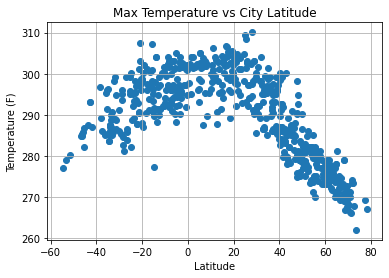

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title("Max Temperature vs City Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/MaxTemperaturevsCityLatitude.png")

plt.show()

The above graph is showing the cities maxium temperature in relation to the cities latitude.

## Latitude vs. Humidity Plot

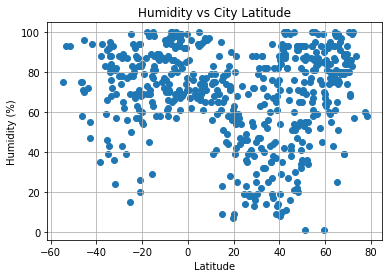

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title("Humidity vs City Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/HumidityvsCityLatitude.png")

plt.show()

The above graph is showing the cities humidity in relation to the cities latitude.

## Latitude vs. Cloudiness Plot

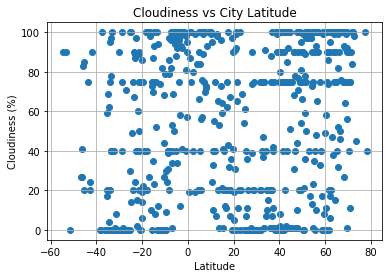

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

plt.title("Cloudiness vs City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/CloudinessvsCityLatitude.png")

plt.show()

The above graph is showing the cities cloudiness in relation to the cities latitude.

## Latitude vs. Wind Speed Plot

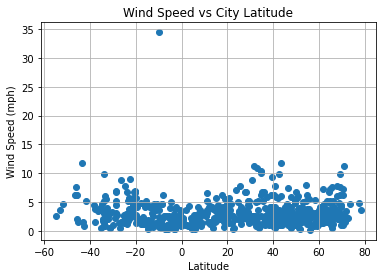

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

plt.title("Wind Speed vs City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/WindSpeedvsCityLatitude.png")

plt.show()

The above graph is showing the cities wind speed in relation to the cities latitude.

## Linear Regression

In [13]:
north_weather =weather_df.loc[weather_df["Lat"] >= 0]

south_weather =weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Max Temp"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = -0.51x +307.78'

The r-value is: 0.7965381872514208


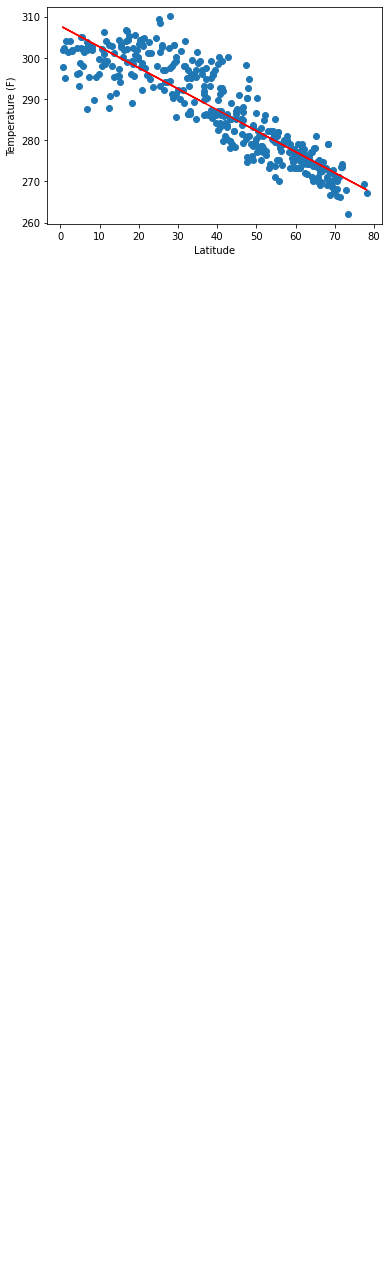

In [15]:
plt.scatter(north_weather["Lat"],north_weather["Max Temp"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NMaxTempvsLatitude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Max Temp"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.3x +299.93'

The r-value is: 0.37664881573447817


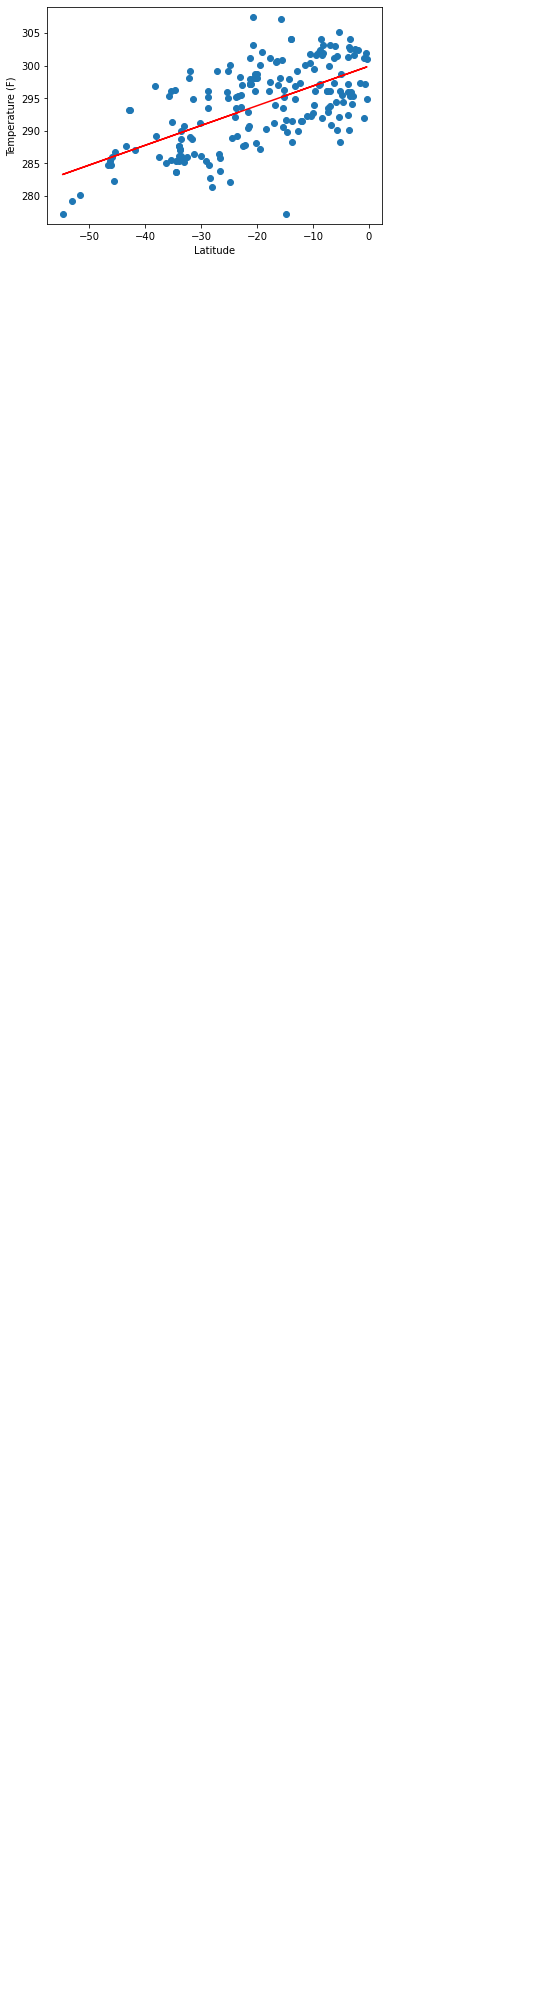

In [17]:
plt.scatter(south_weather["Lat"],south_weather["Max Temp"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SMaxTempvsLatitude.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Humidity"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.22x +57.14'

The r-value is: 0.033898782905727724


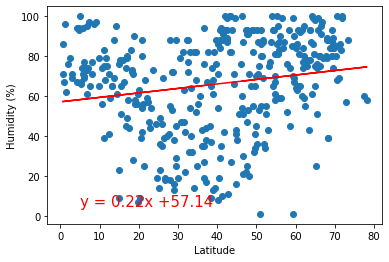

In [19]:
plt.scatter(north_weather["Lat"],north_weather["Humidity"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NHumidityvsLatitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Humidity"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.28x +82.3'

The r-value is: 0.04291517414549897


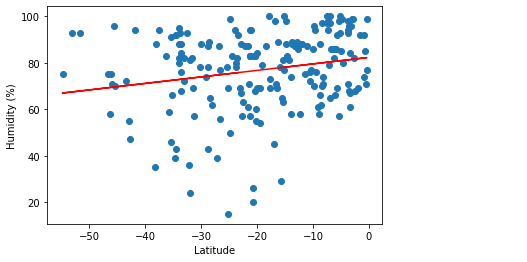

In [21]:
plt.scatter(south_weather["Lat"],south_weather["Humidity"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SHumidityvsLatitude.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Cloudiness"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.32x +41.47'

The r-value is: 0.029327870094679406


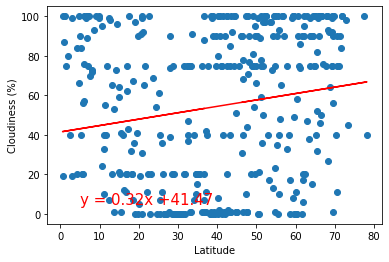

In [23]:
plt.scatter(north_weather["Lat"],north_weather["Cloudiness"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NCloudinessvsLatitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Cloudiness"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.88x +69.21'

The r-value is: 0.0888421185481475


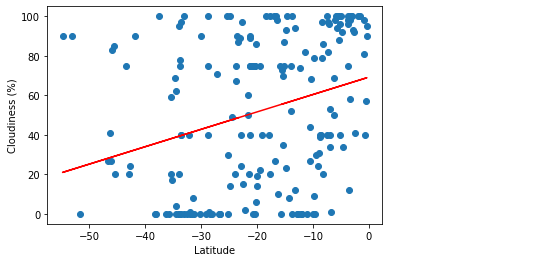

In [25]:
plt.scatter(south_weather["Lat"],south_weather["Cloudiness"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SCloudinessvsLatitude.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather["Lat"], north_weather["Wind Speed"])

regress_values = north_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = 0.01x +2.74'

The r-value is: 0.011399630286306327


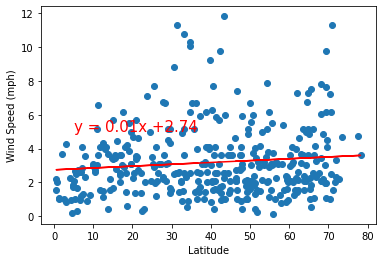

In [27]:
plt.scatter(north_weather["Lat"],north_weather["Wind Speed"])
plt.plot(north_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/NWindSpeedvsLatitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather["Lat"], south_weather["Wind Speed"])

regress_values = south_weather["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

line_eq

'y = -0.05x +2.19'

The r-value is: 0.03926479569112822


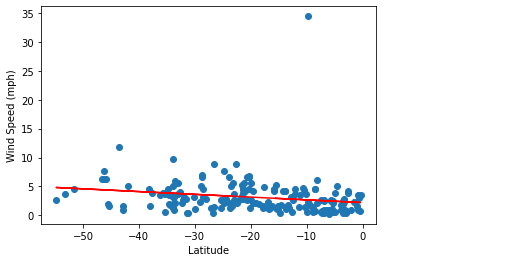

In [29]:
plt.scatter(south_weather["Lat"],south_weather["Wind Speed"])
plt.plot(south_weather["Lat"],regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (5,5), fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/SWindSpeedvsLatitude.png")

plt.show()